In [1]:
# import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

data = pd.read_csv("tinder_google_play_reviews.csv")
print(data.head())

                               reviewId       userName  \
0  b9a3f01f-3fd5-4bc1-acdc-9bdcb8304354  Conrad Taylor   
1  90e02bb2-f9e5-4d12-9fb1-5fd8d9703a7d        Soh Kun   
2  1ea01647-d517-456f-bbf5-868a9c829693   Jarrod Hayes   
3  5fca3420-2167-4246-a819-0bfc5fb3dd41    Aniket pant   
4  b108d5a9-6dc9-4511-9f60-0beaf6b58142        Michael   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0                     80% or more profiles are fake.      2              0   
1  Trick people purchase tinder gold, say trial f...      1              0   
2  use BUMBLE instead I went to download tinder a...      1              1   
3 

[nltk_data] Downloading package stopwords to C:\Users\'Dare
[nltk_data]     Badejo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = data[["content"]]

In [3]:
data.isnull().sum()

content    0
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.shape

(199, 1)

In [6]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

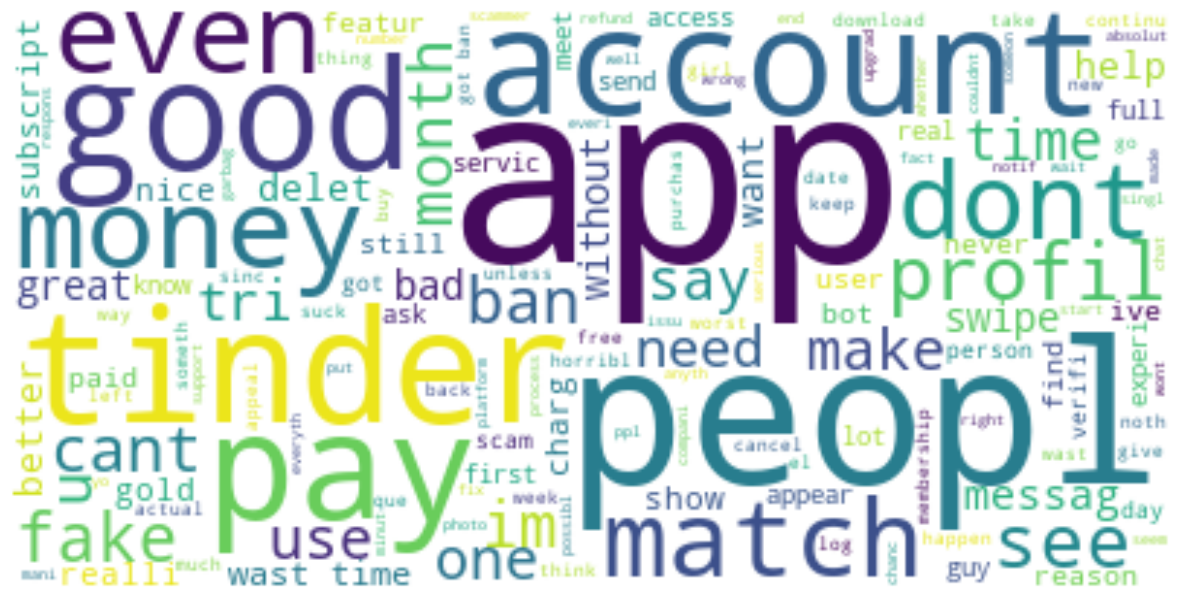

In [7]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

                                             content  Positive  Negative  \
0                                        profil fake     0.000     0.756   
1  trick peopl purchas tinder gold say trial  mon...     0.000     0.052   
2  use bumbl instead went download tinder becom s...     0.181     0.081   
3  verifi account n againb tran might pictur make...     0.000     0.197   
4     realli wish guy would deal fake profil scammer     0.229     0.263   

   Neutral  
0    0.244  
1    0.948  
2    0.738  
3    0.803  
4    0.508  


[nltk_data] Downloading package vader_lexicon to C:\Users\'Dare
[nltk_data]     Badejo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


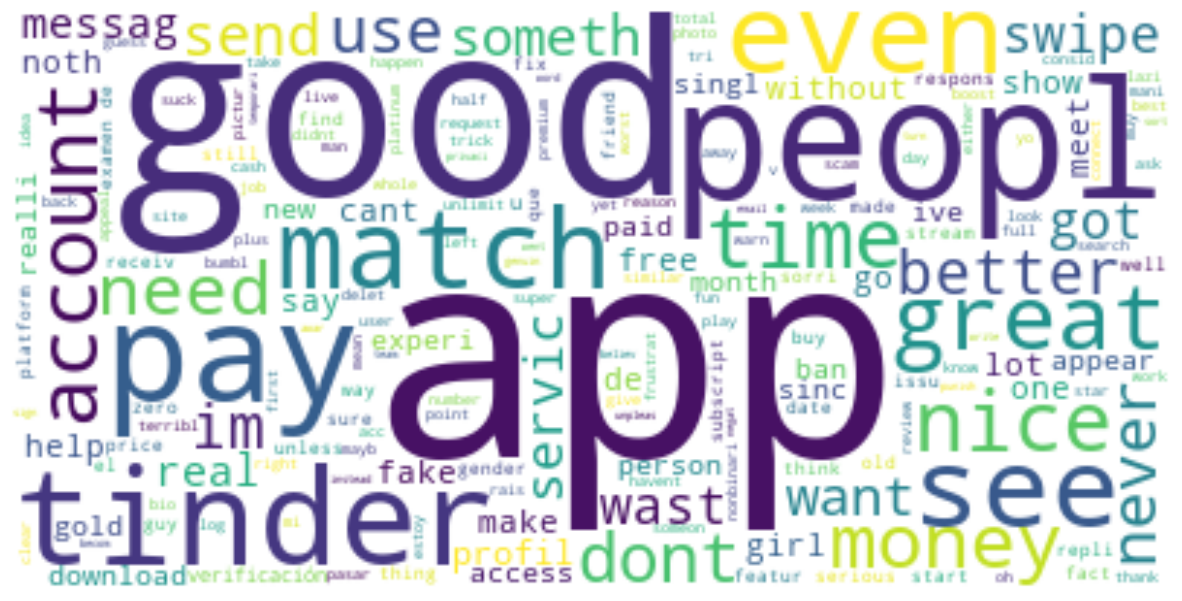

In [9]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

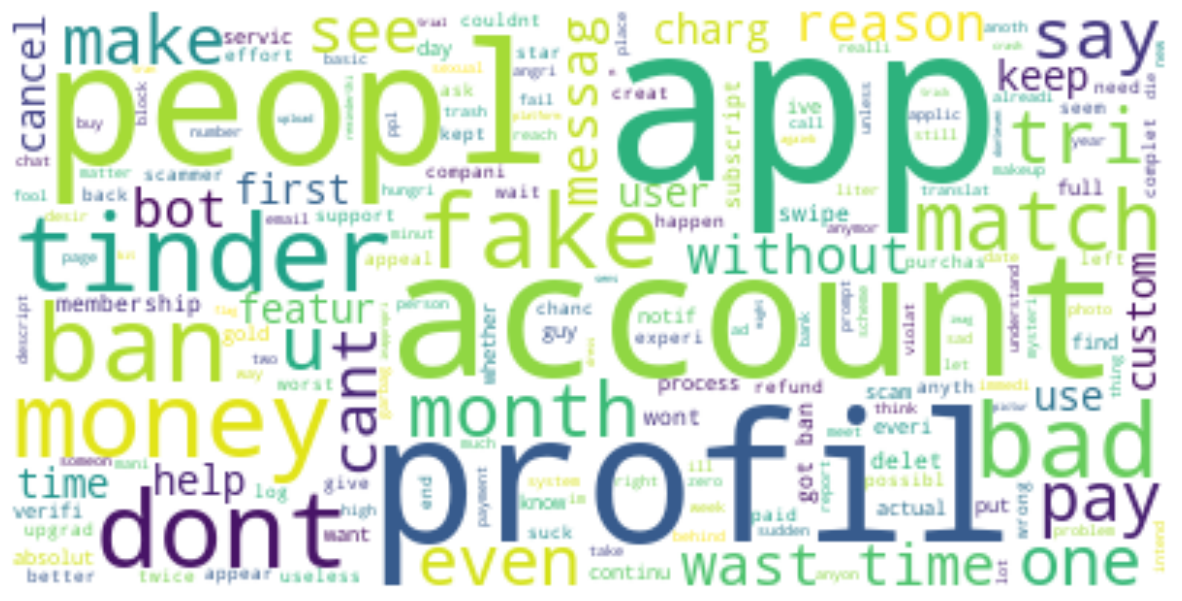

In [10]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 
